In [70]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,6.0]

from classy_sz import Class
import os


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/boris/opt/miniconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [71]:
# snrcut = 7
# from classy_sz import Class

cluster_settings = {

          'non_linear': 'halofit',
          'output' : 'sz_cluster_counts',
          'mass function' : 'M500',

          'has_selection_function' : 1,
          'experiment' : 0, # Planck
          'y_m_relation' : 0,
          'signal-to-noise cut-off for survey cluster completeness' : 6.,
          'use_planck_binned_proba' : 1,

          'M_min' : 5e13,
          'M_max' : 5e15,

          'z_min': 0.,
          'z_max': 1.,

          'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
          'YHe': 'BBN',

          # 1 massive neutrino (planck 2018 baseline)
          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.06,
          'T_ncdm': 0.71611,

          #
          # #3 massive neutrinos
          # N_ur : 0.00641
          # N_ncdm : 1
          # deg_ncdm : 3
          # m_ncdm : 0.02
          # T_ncdm : 0.71611



          # verbose parameters for debugging
          'input_verbose' : 0,
          'background_verbose': 0,
          'perturbations_verbose': 0,
          # class_sz_verbose  : 0




          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 1.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.25,

          'dlny' : 0.01,
          'lnymin' : -11.,
          'lnymax' : -5.,
          'sigmaM_ym' : 0.173,


          'dlnM_cluster_count_completeness_grid' : 0.03,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
          'dz_cluster_count_completeness_grid_low_z' : 5e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,

          'mass_epsrel_cluster_counts' : 1e-3,
          'mass_epsabs_cluster_counts' : 1e-30,

          'redshift_epsrel_cluster_counts' : 1e-3,
          'redshift_epsabs_cluster_counts' : 1e-30,



          #
          #
          # # tabulation of mass function:
          'n_z_dndlnM' : 80,
          'n_m_dndlnM' : 80,
          #
          # # computation of mass function
          # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 80,
          'ndim_redshifts' : 80,
          #
          # pk setup for computation of sigma and dsigma
          'k_per_decade_class_sz' : 20.,
          'k_min_for_pk_class_sz' : 1e-3,
          'k_max_for_pk_class_sz' : 1e1,

          'P_k_max_h/Mpc' : 1e1,

          'class_sz_verbose': 0

}


parameters_settings = {
          # X ray mass bias (if applicable)
          'B' : 1.71,
          'H0' : 67.,
          'sigma8': 0.84,
          'Omega_b': 0.04,
          'Omega_cdm': 0.26
    
}

In [13]:
# try:
#     cluster_settings.pop('non linear')
# except KeyError:
#     print('fine')
# cluster_settings['output'] = 'sz_cluster_counts'

In [14]:
M = Class()
M.set(cluster_settings)
M.set(parameters_settings)
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

# szcountsf90:
#[evaluate]  sigma8 = 0.810188
#[evaluate]  omegam = 0.309952
#[evaluate]  H0 = 68.0053

h : 0.670000
sigma8 : 0.840000
Omega_m : 0.301435
n_s : 0.961900


In [15]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [16]:
np.sum(dNdzdy_theoretical)

426.7948698302745

In [17]:
10**np.asarray(log10y_center)

array([ 6.68343918, 11.88502227, 21.1348904 , 37.58374043])

In [18]:
np.asarray(z_center)

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [19]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][:-1]))
N_clusters_y_theory = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))


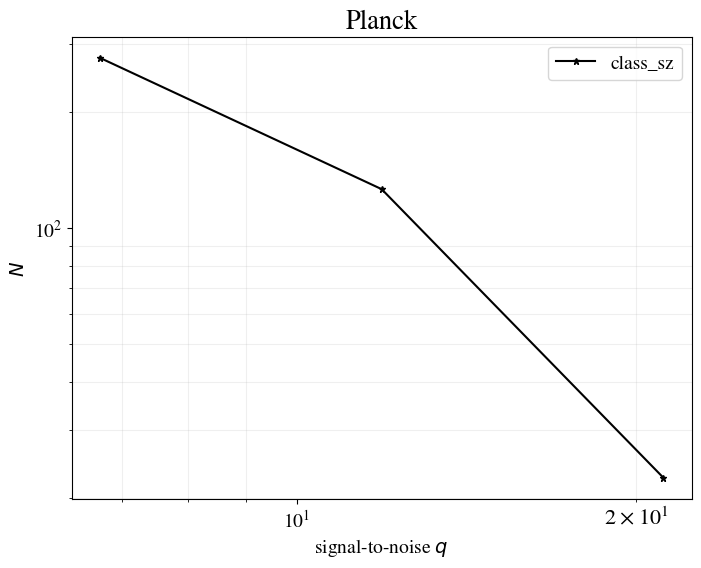

In [20]:
plt.figure(figsize=(8,6))

plt.plot(10**np.asarray(log10y_center[:-1]),N_clusters_y_theory[:-1],
             marker='*',markersize=5.,ls='-',label='class_sz',c='k')

# plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.grid()
plt.show()

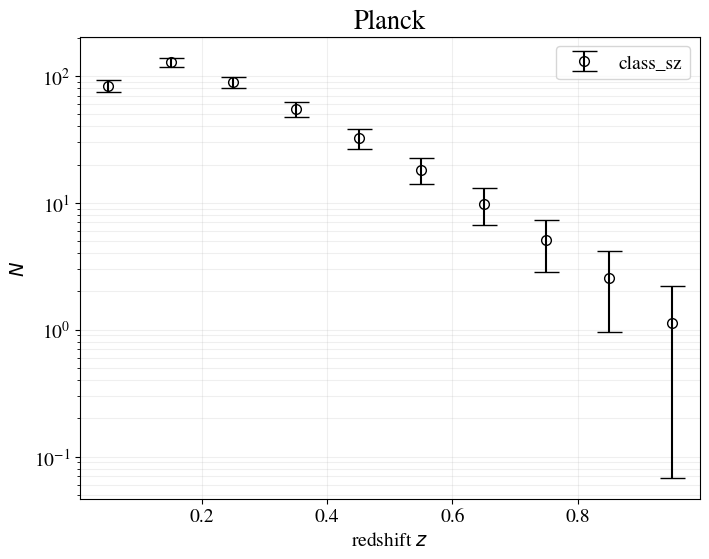

In [21]:
plt.figure(figsize=(8,6))

plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
             label='class_sz',capsize=9,
             markerfacecolor='none',
             c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.show()

# read-in the planck catalogue:


In [79]:
from soliket.sz_binned_cluster_counts.binned_cc import binned_cc_likelihood
soliket_lkl = binned_cc_likelihood

soliket_lkl.tcat_file =  'SZ_cat.txt'
soliket_lkl.snrcut =  6.
soliket_lkl.experiment =  'Planck'

soliket_lkl.bin_z_min_cluster_counts  =  0.
soliket_lkl.bin_z_max_cluster_counts  =  1.
soliket_lkl.bin_dz_cluster_counts  =  0.1
soliket_lkl.bin_dlog10_snr =  0.25
soliket_lkl.debug =  True

In [80]:
# here copy the planck likelihood initialize from soliket:
def initialize(self):
    SZ_catalog = np.loadtxt(os.path.join(self.data_directory, self.tcat_file))
    if self.experiment == 'Planck':
        SZ_catalog = np.loadtxt(os.path.join(self.data_directory, self.tcat_file))
        if self.debug:
            print("starting setting up catalogue data")
        # print(self.theory.extra_args['M_min'])
            print(self.bin_z_min_cluster_counts)

        # exit(0)

        z_0 = self.bin_z_min_cluster_counts;
        z_max = self.bin_z_max_cluster_counts;
        dz = self.bin_dz_cluster_counts;
        Nbins_z = int((z_max - z_0)/dz)
        z_center = np.zeros(Nbins_z)


        # class_alloc(pcsz->z_center,pcsz->Nbins_z*sizeof(double),pcsz->error_message);
        # int index_z;
        for index_z in range(Nbins_z):
            z_center[index_z] = z_0 + 0.5*dz + index_z*dz;
            if self.debug:
                print("z_center:",z_center[index_z])
            # print("index_z=%d, z_center=%e\n"%(index_z,z_center[index_z]))

        logy_min =  0.7 # set for planck
        logy_max = 1.5 # set for planck
        dlogy = self.bin_dlog10_snr
        #
        Nbins_y = int((logy_max - logy_min)/dlogy)+1
        if self.debug:
            print('Nbins_y:',Nbins_y,self.bin_dlog10_snr)
        logy = np.zeros(Nbins_y)
        y_i = logy_min + dlogy/2.
        for index_y in range(Nbins_y):
            logy[index_y] = y_i
            y_i += dlogy
            if self.debug:
                print("y_center:",index_y,Nbins_y,10**logy[index_y])

        self.dNdzdy_catalog = np.zeros([Nbins_z,Nbins_y])

        nrows = len(SZ_catalog[:,0])
        if self.debug:
            print('number of rows in catalogue:',nrows)


        zmin = z_0
        zmax = zmin +dz
        # Count the number of clusters in each (z,y) bin
        for i in range (Nbins_z):
            for j in range (Nbins_y):
                y_min = logy[j]-dlogy/2.
                y_max = logy[j]+dlogy/2.
                y_min = 10**y_min
                y_max = 10**y_max
                # if j == Nbins_y:
                #     y_max = 1e100

                for ii in range(0,nrows):
                    if (SZ_catalog[ii][0]>=zmin) and (SZ_catalog[ii][0]<zmax)\
                       and (SZ_catalog[ii][2]<y_max) and (SZ_catalog[ii][2]>=y_min):
                        self.dNdzdy_catalog[i][j] += 1.
            # Count the number of clusters in the last y bin for each z bin
            # j = Nbins_y
            # y_min =y_max
            # for ii in range(0,nrows):
            #     if (SZ_catalog[ii][0]>=zmin) and (SZ_catalog[ii][0]<zmax)\
            #        and (SZ_catalog[ii][2]>=y_min):
            #         self.dNdzdy_catalog[i][j] += 1.
            # Change edges of the redshift bin
            zmin += dz
            zmax += dz

        # Count the number of clusters in each y bin with missing redshifts and apply normalization
        for j in range(0,Nbins_y):
            y_min = logy[j]-dlogy/2.
            y_max = logy[j]+dlogy/2.
            y_min = 10**y_min
            y_max = 10**y_max
            for ii in range(0,nrows):
                if (SZ_catalog[ii][0]==-1) \
                   and (SZ_catalog[ii][2]<y_max) and (SZ_catalog[ii][2]>=y_min):
                    norm = 0
                    for jj in range(0,Nbins_z):
                        norm += self.dNdzdy_catalog[jj][j]
                    self.dNdzdy_catalog[:,j] *= (1.+norm)/norm

        # # Count the number of clusters in the last y bin with missing redshifts and apply normalization
        # j = Nbins_y
        # y_min =y_max
        # for ii in range(0,nrows):
        #     if (SZ_catalog[ii][0]==-1) and (SZ_catalog[ii][2]>=y_min):
        #         norm = 0.
        #         for jj in range(0,Nbins_z):
        #             norm += self.dNdzdy_catalog[jj][j]
        #         self.dNdzdy_catalog[:,j] *= (1.+norm)/norm
        if self.debug:
            print("Ntot cat:",np.sum(self.dNdzdy_catalog[:,:]))
        # exit(0)



In [81]:
initialize(soliket_lkl)

starting setting up catalogue data
0.0
z_center: 0.05
z_center: 0.15000000000000002
z_center: 0.25
z_center: 0.35000000000000003
z_center: 0.45
z_center: 0.55
z_center: 0.6500000000000001
z_center: 0.7500000000000001
z_center: 0.8500000000000001
z_center: 0.9500000000000001
Nbins_y: 4 0.25
y_center: 0 4 6.6834391756861455
y_center: 1 4 11.885022274370183
y_center: 2 4 21.134890398366466
y_center: 3 4 37.583740428844415
number of rows in catalogue: 438
Ntot cat: 438.0


In [83]:
soliket_lkl.dNdzdy_catalog

array([[57.2398524 , 34.        , 10.        ,  6.        ],
       [61.32841328, 32.        ,  9.        ,  0.        ],
       [71.5498155 , 31.        ,  7.        ,  0.        ],
       [49.06273063, 14.        ,  2.        ,  0.        ],
       [18.39852399, 12.        ,  0.        ,  0.        ],
       [13.28782288,  2.        ,  0.        ,  0.        ],
       [ 4.08856089,  0.        ,  0.        ,  0.        ],
       [ 1.02214022,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ,  0.        ],
       [ 1.02214022,  0.        ,  0.        ,  0.        ]])

In [84]:
Nq_cat = np.sum(soliket_lkl.dNdzdy_catalog,axis=0)

In [85]:
Nz_cat = np.sum(soliket_lkl.dNdzdy_catalog,axis=1)

# Plot planck catalogue against class_sz prediction

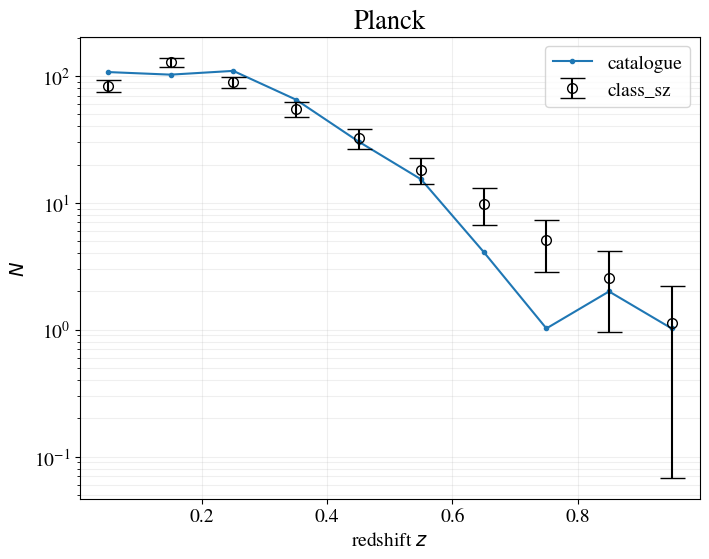

In [29]:
plt.figure(figsize=(8,6))


plt.plot(z_center,Nz_cat,label='catalogue',marker='.')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=7.,ls='none',
             label='class_sz',capsize=9,
             markerfacecolor='none',
             c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.show()

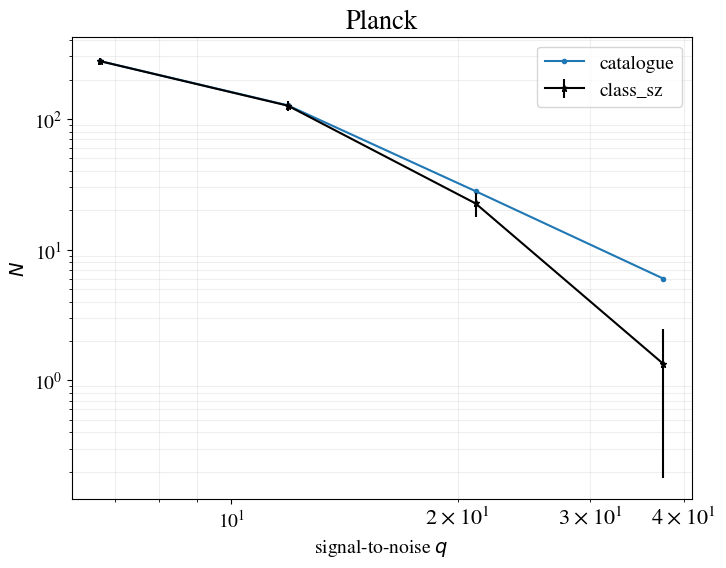

In [31]:
plt.figure(figsize=(8,6))

plt.plot(10**np.asarray(log10y_center),Nq_cat,label='catalogue',marker='.')
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
             marker='*',markersize=5.,ls='-',label='class_sz',c='k')

# plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.grid()
plt.show()

In [66]:
Nq_cat

array([277., 127.,  28.,   6.,   0.])

In [61]:
10**np.asarray(log10y_center[:-1])

array([ 6.68343918, 11.88502227, 21.1348904 , 37.58374043])

In [62]:
N_z,N_y = np.shape(dNdzdy_theoretical)

In [63]:
N_z,N_y

(10, 5)

# study impact of a parameter

In [49]:
parameters_settings = {
          # X ray mass bias (if applicable)
          'B' : 1.71,
          'H0' : 67.,
          # 'sigma8': 0.84,
          'ln10^{10}A_s': 3.05,
          'Omega_b': 0.04,
          'Omega_cdm': 0.26
}
    

In [50]:
dNdzdy_theoretical_list = []
p_list = np.linspace(0.8,1.,4)
p_name = 'n_s'
for p in p_list:
    M = Class()
    M.set(cluster_settings)
    M.set(parameters_settings)
    M.set({p_name:p})
    M.compute()
    print('h : %f'%M.h())
    print('sigma8 : %f'%M.sigma8())
    print('Omega_m : %f'%M.Omega_m())
    print('n_s : %f'%M.n_s())
    dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
    dNdzdy_theoretical_list.append(dNdzdy_theoretical)


h : 0.670000
sigma8 : 0.780315
Omega_m : 0.301435
n_s : 0.800000
h : 0.670000
sigma8 : 0.798539
Omega_m : 0.301435
n_s : 0.866667
h : 0.670000
sigma8 : 0.817961
Omega_m : 0.301435
n_s : 0.933333
h : 0.670000
sigma8 : 0.838627
Omega_m : 0.301435
n_s : 1.000000


In [35]:
# dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

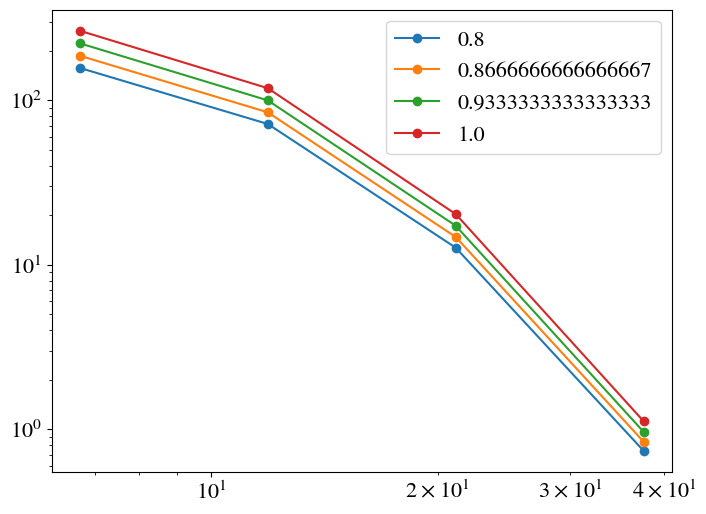

In [51]:
for (ip,p) in enumerate(p_list):
    Nq = np.sum(dNdzdy_theoretical_list[ip],axis=0)
    plt.plot(10**np.asarray(log10y_center),Nq,label=p,marker='o')
plt.loglog()
plt.legend()

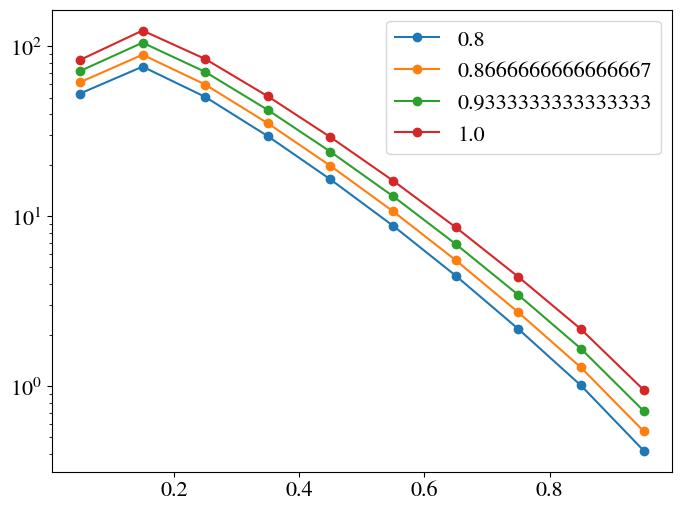

In [52]:
for (ip,p) in enumerate(p_list):
    Nz = np.sum(dNdzdy_theoretical_list[ip],axis=1)
    plt.plot(z_center,Nz,label=p,marker='o')
plt.yscale('log')
plt.legend()

# plot bestfit from the chains

In [87]:
path_to_likestats = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/sz_binned_cluster_counts/chains/so_sz_unbinned_cluster_counts_planck_test_alice_ev.likestats'
pdict = {}
with open(path_to_likestats) as f:
    for line in f:
        x = line.strip()
        if x:
            l = re.split('\s',x)
            l = [e for e in l if e]
            if l[0]=="logA":
                logA = float(l[1])
                pdict['ln10^{10}A_s'] = logA
                print('logA:',logA)
            if l[0]=="A_s":
                A_s = float(l[1])
                print(A_s)
            if l[0]=="B":
                B = float(l[1])
                print('B',B)
                pdict['B'] = B
            if l[0]=="H0":
                H0 = float(l[1])
                print('H0:',H0)
                pdict['H0'] = H0
            if l[0]=="n_s":
                n_s = float(l[1])
                print('n_s:',n_s)
                pdict['n_s'] = n_s
            if l[0]=="omega_b":
                omega_b = float(l[1])
                print(omega_b)
                pdict['omega_b'] = omega_b
            if l[0]=="omega_cdm":
                omega_cdm = float(l[1])
                print(omega_cdm)
                pdict['omega_cdm'] = omega_cdm

H0: 63.24668
logA: 2.9423912
n_s: 1.0588077
B 1.0788227
0.021080705
0.030105731


In [88]:
pdict

{'H0': 63.24668,
 'ln10^{10}A_s': 2.9423912,
 'n_s': 1.0588077,
 'B': 1.0788227,
 'omega_b': 0.021080705,
 'omega_cdm': 0.030105731}

In [89]:
M = Class()
M.set(cluster_settings)
M.set(pdict)
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())


h : 0.632467
sigma8 : 0.271746
Omega_m : 0.129572
n_s : 1.058808


In [90]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [91]:
np.sum(dNdzdy_theoretical)

6.01274273806045e-07

In [92]:
N_clusters_z_theory = np.sum(dNdzdy_theoretical,axis=1)
N_clusters_y_theory =  np.sum(dNdzdy_theoretical,axis=0)

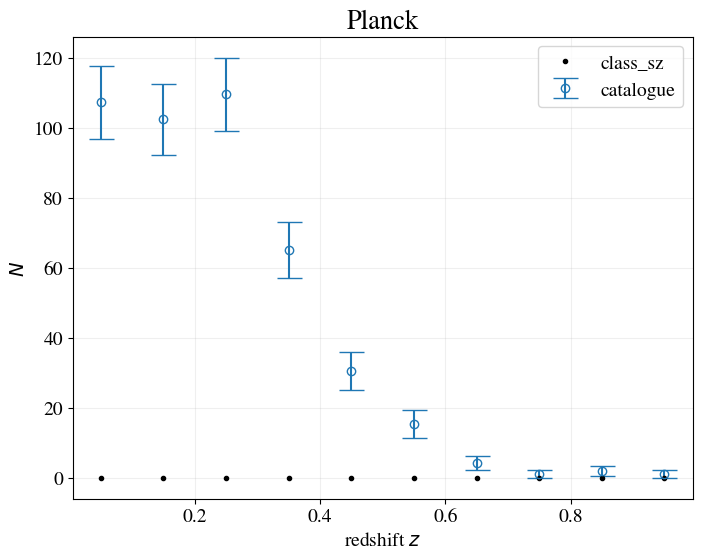

In [93]:
plt.figure(figsize=(8,6))


plt.errorbar(z_center,Nz_cat,yerr=np.sqrt(Nz_cat),label='catalogue',marker='o',capsize=9,markerfacecolor='none',
            ls='none',)
plt.plot(z_center,N_clusters_z_theory,
         marker='.',
         ls='none',
         label='class_sz',
          c='k')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.ylim(1e-2,2e3)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.show()

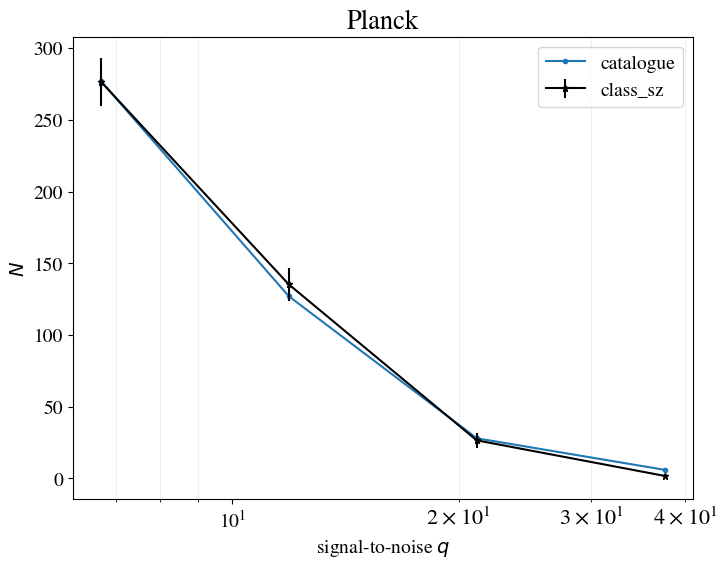

In [86]:
plt.figure(figsize=(8,6))

plt.plot(10**np.asarray(log10y_center),Nq_cat,label='catalogue',marker='.')
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
             marker='*',markersize=5.,ls='-',label='class_sz',c='k')

# plt.ylim(7e-2,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('linear')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(which = 'both',alpha = 0.2)
plt.title('Planck')
plt.grid()
plt.show()

In [88]:
np.ones([10,9])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

# mass integral

In [2]:
M = Class()
M.set(
{
#output = sz_unbinned_cluster_counts
'output'  : 'hmf,sz_cluster_counts',
'mass function'   : 'M500',
'has_selection_function'  : 1,
'experiment'  : 0,

'y_m_relation'  : 0,

'use_planck_binned_proba'  : 1,

'class_sz_verbose'   : 0,

'M_min'  : 5e12,
'M_max'  : 1e16,

'mass_epsrel'  : 1e-8,
'mass_epsabs'  : 1e-60,

'redshift_epsrel'  : 1e-8,
'redshift_epsabs'  : 1e-60,

'z_min'  : 0.,
'z_max'  : 1.,

'm_pivot_ym [Msun]'  : 3e14,

'N_ur' : 2.0328,
'N_ncdm' : 1,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,

'non_linear' : 'halofit',
    
'signal-to-noise cut-off for survey cluster completeness'  : 6,

'h' :0.7,
'Omega_b' :0.04,
'Omega_cdm' :0.26,
'sigma8' :0.8,
'n_s'  : 0.95,
'B'  : 1.,
    
    
'bin_z_min_cluster_counts' : 0.,
'bin_z_max_cluster_counts' : 1.,
'bin_dz_cluster_counts' : 1., # fiducial 0.1
'bin_dlog10_snr': 0.5,

#the paramater dlny is crucial, it controls the speed of the calculation
#important to check that lnymin and lnymax are broad enough
'dlny' : 0.01,
'lnymin' : -11.,
'lnymax' : -5.,
#sigmaM_ym = 0.173

#case with no scatter:
'sigmaM_ym' : 0.,

'dlnM_cluster_count_completeness_grid' : 0.03,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,

}
)
# M.set(pdict)
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())


h : 0.700000
sigma8 : 0.800000
Omega_m : 0.301315
n_s : 0.950000


In [51]:
m_min = 5e12
m_max = 1e16
z_min = 1e-4
z_max = 1. 
hmf = np.vectorize(M.get_dndlnM_at_z_and_M)
vol = np.vectorize(M.get_volume_dVdzdOmega_at_z)

In [52]:
z_grid = np.linspace(z_min,z_max,1000)
lnm_grid = np.linspace(np.log(m_min),np.log(m_max),2000)

In [53]:
dndz = np.trapz(vol(z_grid)[:,None]*hmf(z_grid[:,None],np.exp(lnm_grid)),lnm_grid,axis=1)*4.*np.pi
'%.3e'%np.trapz(dndz,z_grid)

'1.974e+07'

In [58]:
vol1 = np.ones(np.shape(vol(z_grid)[:,None]))
hmf1 = np.ones(np.shape(hmf(z_grid[:,None],np.exp(lnm_grid))))

In [61]:
dndz1 = np.trapz(vol1*hmf1,lnm_grid,axis=1)*4.*np.pi
'%.3e'%np.trapz(dndz1,z_grid)

'9.551e+01'

In [63]:
np.trapz(dndz1,z_grid)

95.50620573446902

In [66]:
dndz1[0]/4./np.pi

7.6009024595420875

In [65]:
np.log(1e16)-np.log(5e12)

7.6009024595420875